# **Titanic Survival Model Using Decision Trees**

In [149]:
import pandas as pd

file = 'titanic_data.csv'
full_data = pd.read_csv(file)
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Recall that these are the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  


In [150]:
features = full_data.drop('Survived', axis=1)
target = full_data['Survived']
features.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Data Preprocessing**

In [151]:
features_no_names = features.drop('Name', axis=1)
features = pd.get_dummies(features_no_names)

In [152]:
features = features.fillna(0.0) # fill any blanks with zeros

In [153]:
features.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,3,26.0,0,0,7.9250,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,35.0,1,0,53.1000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,3,35.0,0,0,8.0500,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


## **Training The Model**

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [155]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## **Testing The Model**

In [156]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.8156424581005587


## **Improving The Model**

- High training accuracy and a lower testing accuracy indicates overfitting
- Tune Hyperparameters in order to improve the testing accuracy, such as:
    - `max_depth`
    - `min_samples_leaf`
    - `min_samples_split`


In [157]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [1, 3, 5, 7, 9, 11, None],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 15, 20]
} # Dictionary

model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 175 candidates, totalling 875 fits
Best parameters found:  {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 15}


In [158]:
# Training the model
model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=15)
model.fit(X_train, y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.8792134831460674
The test accuracy is 0.8491620111731844


-----------------------

# **Practise again**

1. Load Data and get information
2. EDA
3. Preprocess Data
4. Building, initializing the model
5. Model training
6. Model evaluation
7. Model improvement
8. Final Model

## **Load Data and Information**

In [159]:
import pandas as pd

file = 'titanic_data.csv'

def data_loading(file):
    data = pd.read_csv(file)
    return data

data = data_loading(file)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [161]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [162]:
data.duplicated().sum()

0

## **EDA**

In [163]:
data.describe(include=['number']).T # stats for numerical features

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [164]:
data.describe(include=['object']).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


### **Some Bivarate Analysis and Visualizations**

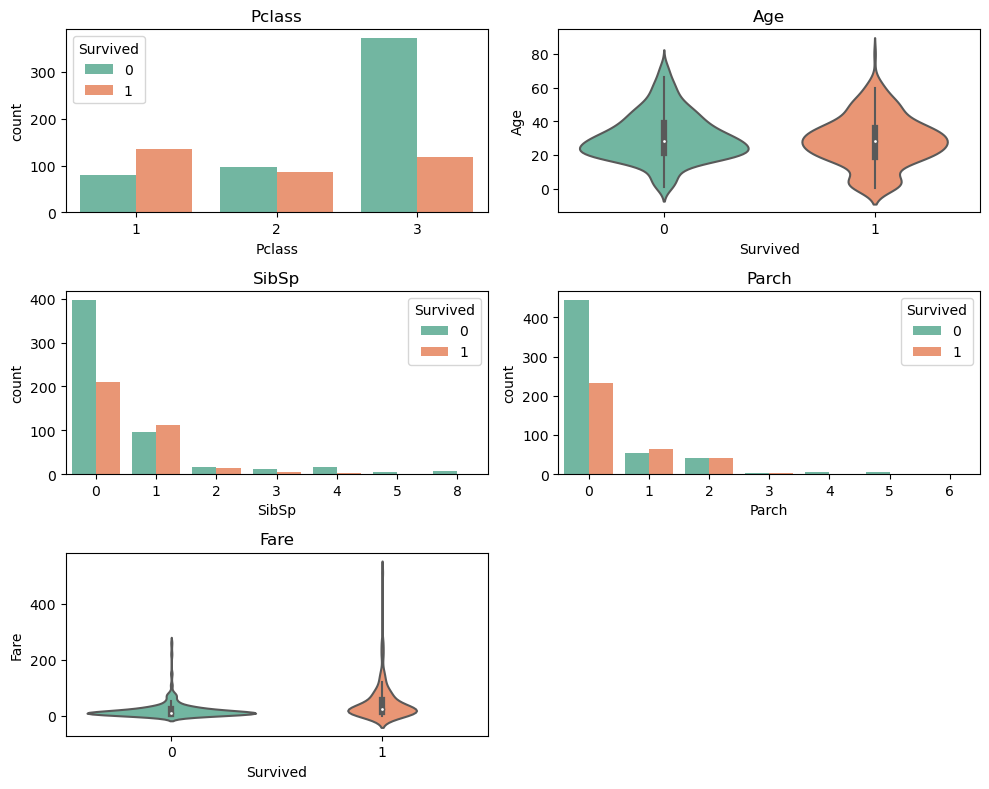

In [165]:
import matplotlib.pyplot as plt 
import seaborn as sns


# For numerical features
col_num = data.select_dtypes('number').columns.to_list()
col_num.remove('PassengerId')
col_num.remove('Survived')

def plot_numerical_features(data):
    rows = (len(col_num) // 2 + (1 if len(col_num) % 2 > 0 else 0))
    fig, axes = plt.subplots(rows, 2, figsize=(10, 8))
    axes = axes.flatten()
    
    for i, feature in enumerate(col_num):
        
        if feature in ['Age', 'Fare']:
            sns.violinplot(data=data, x='Survived', y=feature, ax=axes[i], palette='Set2')
            axes[i].set_title(feature)
        else:
            sns.countplot(data=data, x=feature, hue='Survived', ax=axes[i], palette='Set2')
            axes[i].set_title(feature)
    
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    

plot_numerical_features(data)

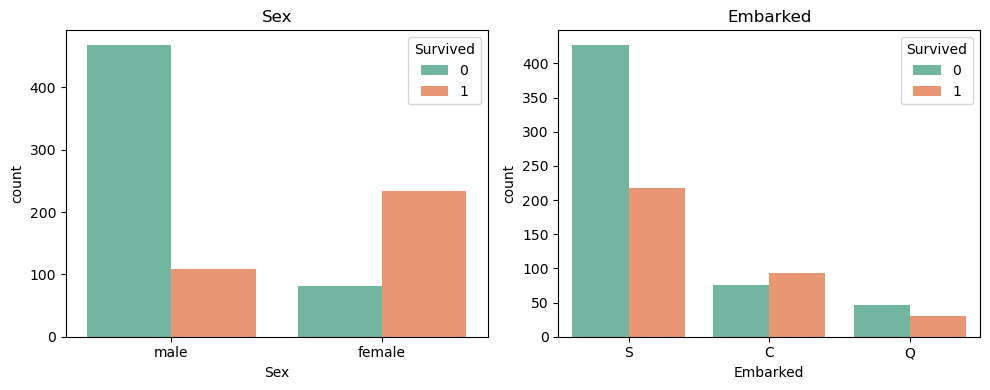

In [166]:
#For categorical features

col_cat = data.select_dtypes('object').columns.to_list() 
col_cat.remove('Name')
col_cat.remove('Ticket')
col_cat.remove('Cabin')

def plot_categorical_features(data):
    rows = (len(col_cat) // 2 +(1 if len(col_cat) % 2 > 0 else 0))
    fig, axes = plt.subplots(rows, 2, figsize=(10, 4))
    axes = axes.flatten()
    
    for i, feature in enumerate(col_cat):
        sns.countplot(data=data, x=feature, hue='Survived', ax=axes[i], palette='Set2')
        axes[i].set_title(feature)
    
    for j in range(i+1, len(col_cat)):
        fid.delaxes[j]
        
    plt.tight_layout()
    plt.show()

plot_categorical_features(data)   

## **Preprocess Data**

In [167]:
data = data_loading(file)
data = data.drop(['Name', 'PassengerId', 'Cabin', 'Ticket'], axis=1)

In [168]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [169]:
target = data['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [170]:
features = data.drop('Survived', axis=1)
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [171]:
features = pd.get_dummies(features)
features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


In [172]:
features = features.fillna(0.0)

## **Model Building & Training**

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [177]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## **Model Evaluation**

In [178]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.9803370786516854
The test accuracy is 0.776536312849162


## **Model improvements & Final Model**

In [184]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [1, 3, 5, 7, 9, 11, None],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 15, 20]
} # Dictionary

model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 175 candidates, totalling 875 fits
Best parameters found:  {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 15}


In [190]:
# Training the model
model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=15)
model.fit(X_train, y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.8637640449438202
The test accuracy is 0.8770949720670391
